In [5]:
%run ../imports.ipynb

### Loading Shots and Misses Data

In [6]:
df = pd.read_csv('../data/shots/shots_final.csv', compression='gzip')
df = df[main_features + features]
df.head()

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,ACTION_TYPE,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_NAME,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,HTM,VTM,GAME_ID
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,-1,Cutting Layup Shot,0,1,203145,Kent Bazemore,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Atlanta Hawks,1610612737,609,138,20151027,ATL,DET,21500001
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,2,Driving Finger Roll Layup Shot,0,0,203145,Kent Bazemore,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Atlanta Hawks,1610612737,508,152,20151027,ATL,DET,21500001
2,25.25,226.44,2.54,212.14,13.03258,594.91,-180.1479,159.0252,-183,174,Jump Shot,0,25,203145,Kent Bazemore,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,594,260,20151027,ATL,DET,21500001
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,-1,Cutting Layup Shot,1,1,203471,Dennis Schroder,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Atlanta Hawks,1610612737,253,81,20151027,ATL,DET,21500001
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,2,Driving Layup Shot,0,1,203471,Dennis Schroder,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,Atlanta Hawks,1610612737,151,92,20151027,ATL,DET,21500001


In [41]:
df_miss = pd.read_csv('misses_trainset.csv', compression='gzip')
df_miss.rename({'Unnamed: 0':'index'}, axis=1, inplace=True)
df_miss.set_index('index', inplace=True)
df_miss.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33193 entries, 2 to 87527
Data columns (total 28 columns):
shot_rho           33193 non-null float64
shot_angle         33193 non-null float64
reb_rho            33193 non-null float64
reb_angle          33193 non-null float64
reb_height         33193 non-null float64
reb_time           33193 non-null float64
x                  33193 non-null float64
y                  33193 non-null float64
LOC_X              33193 non-null int64
LOC_Y              33193 non-null int64
ACTION_TYPE        33193 non-null object
SHOT_MADE_FLAG     33193 non-null int64
SHOT_DISTANCE      33193 non-null int64
PLAYER_ID          33193 non-null int64
PLAYER_NAME        33193 non-null object
SHOT_TYPE          33193 non-null object
SHOT_ZONE_AREA     33193 non-null object
SHOT_ZONE_BASIC    33193 non-null object
SHOT_ZONE_RANGE    33193 non-null object
TEAM_NAME          33193 non-null object
TEAM_ID            33193 non-null int64
EVENTTIME          33193 non

In [42]:
y = df_miss['reb_rho']
df_X = df_miss[['shot_rho','shot_angle','PLAYER_NAME']]

In [43]:
df_X = pd.get_dummies(df_X, prefix='x', columns=['PLAYER_NAME'], dtype='uint8')
df_X.head()

,shot_rho,shot_angle,x_Aaron Brooks,x_Aaron Gordon,x_Aaron Harrison,x_Adreian Payne,x_Al Horford,x_Al Jefferson,x_Al-Farouq Aminu,x_Alec Burks,x_Alex Len,x_Alexis Ajinca,x_Allen Crabbe,x_Alonzo Gee,x_Amar'e Stoudemire,x_Amir Johnson,x_Anderson Varejao,x_Andre Drummond,x_Andre Iguodala,x_Andre Miller,x_Andre Roberson,x_Andrew Bogut,x_Andrew Nicholson,x_Andrew Wiggins,x_Anthony Brown,x_Anthony Davis,x_Anthony Morrow,x_Anthony Tolliver,x_Archie Goodwin,x_Aron Baynes,x_Arron Afflalo,x_Austin Rivers,x_Avery Bradley,x_Ben McLemore,x_Bismack Biyombo,x_Blake Griffin,x_Boban Marjanovic,x_Bobby Portis,x_Bojan Bogdanovic,x_Boris Diaw,x_Bradley Beal,x_Brandan Wright,x_Brandon Bass,x_Brandon Jennings,x_Brandon Knight,...,x_Tayshaun Prince,x_Terrence Jones,x_Terrence Ross,x_Terry Rozier,x_Thabo Sefolosha,x_Thaddeus Young,x_Thomas Robinson,x_Tiago Splitter,x_Tibor Pleiss,x_Tim Duncan,x_Tim Frazier,x_Tim Hardaway Jr.,x_Timofey Mozgov,x_Tobias Harris,x_Toney Douglas,x_Tony Allen,x_Tony Parker,x_Tony Snell,x_Tony Wroten,x_Trevor Ariza,x_Trevor Booker,x_Trey Burke,x_Trey Lyles,x_Tristan Thompson,x_Troy Daniels,x_Ty Lawson,x_Tyler Ennis,x_Tyler Hansbrough,x_Tyler Johnson,x_Tyler Zeller,x_Tyreke Evans,x_Tyson Chandler,x_Tyus Jones,x_Udonis Haslem,x_Victor Oladipo,x_Vince Carter,x_Wayne Ellington,x_Wesley Johnson,x_Wesley Matthews,x_Will Barton,x_Willie Cauley-Stein,x_Willie Reed,x_Zach LaVine,x_Zach Randolph,x_Zaza Pachulia
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,25.25,226.44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,25.63,230.22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,25.06,217.05,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13,24.42,177.65,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
15,20.52,143.52,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### Regular Feed-Forward  1 Layer Neural Network

In [18]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

In [ ]:
ss = StandardScaler()
X = ss.fit_transform(df_X)

In [25]:
def base_nn():
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(.2))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [26]:
seed = 42
np.random.seed(seed)
estimator = KerasRegressor(build_fn=base_nn, epochs=50, batch_size=5, verbose=1)

In [27]:
kfold = KFold(n_splits=5, random_state=seed)
results = cross_val_score(estimator, X, y, cv=kfold)

Epoch 1/50
26554/26554 [==============================] - 29s 1ms/step - loss: 52.4249
Epoch 2/50
26554/26554 [==============================] - 29s 1ms/step - loss: 51.6728
Epoch 3/50
26554/26554 [==============================] - 30s 1ms/step - loss: 51.4991
Epoch 4/50
26554/26554 [==============================] - 34s 1ms/step - loss: 51.3718
Epoch 5/50
26554/26554 [==============================] - 28s 1ms/step - loss: 51.2955
Epoch 6/50
26554/26554 [==============================] - 33s 1ms/step - loss: 51.1513
Epoch 7/50
26554/26554 [==============================] - 34s 1ms/step - loss: 50.8480
Epoch 8/50
26554/26554 [==============================] - 28s 1ms/step - loss: 50.8396
Epoch 9/50
26554/26554 [==============================] - 28s 1ms/step - loss: 50.8061
Epoch 10/50
26554/26554 [==============================] - 28s 1ms/step - loss: 50.6866 0s - loss: 50.
Epoch 11/50
26554/26554 [==============================] - 27s 1ms/step - loss: 50.6973
Epoch 12/50
26554/26554 [=

26554/26554 [==============================] - 24s 893us/step - loss: 52.2898
Epoch 43/50
26554/26554 [==============================] - 21s 804us/step - loss: 52.9550
Epoch 44/50
26554/26554 [==============================] - 22s 821us/step - loss: 52.7752
Epoch 45/50
26554/26554 [==============================] - 25s 945us/step - loss: 52.1845
Epoch 46/50
26554/26554 [==============================] - 29s 1ms/step - loss: 52.5639
Epoch 47/50
26554/26554 [==============================] - 26s 965us/step - loss: 52.7432
Epoch 48/50
26554/26554 [==============================] - 24s 894us/step - loss: 52.6203
Epoch 49/50
26554/26554 [==============================] - 25s 952us/step - loss: 52.3420
Epoch 50/50
6639/6639 [==============================] - 2s 251us/step
Epoch 1/50
26554/26554 [==============================] - 25s 948us/step - loss: 55.7041
Epoch 2/50
26554/26554 [==============================] - 26s 968us/step - loss: 54.8798
Epoch 3/50
26554/26554 [=====================

26555/26555 [==============================] - 31s 1ms/step - loss: 54.6557
Epoch 34/50
26555/26555 [==============================] - 31s 1ms/step - loss: 54.2948
Epoch 35/50
26555/26555 [==============================] - 32s 1ms/step - loss: 54.5809
Epoch 36/50
26555/26555 [==============================] - 29s 1ms/step - loss: 54.0058
Epoch 37/50
26555/26555 [==============================] - 28s 1ms/step - loss: 54.6919
Epoch 38/50
26555/26555 [==============================] - 28s 1ms/step - loss: 54.3490
Epoch 39/50
26555/26555 [==============================] - 29s 1ms/step - loss: 54.8259
Epoch 40/50
26555/26555 [==============================] - 29s 1ms/step - loss: 54.0236
Epoch 41/50
26555/26555 [==============================] - 30s 1ms/step - loss: 54.2757
Epoch 42/50
26555/26555 [==============================] - 29s 1ms/step - loss: 53.9535
Epoch 43/50
26555/26555 [==============================] - 28s 1ms/step - loss: 54.6501
Epoch 44/50
26555/26555 [===================

In [28]:
print("Results: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Results: -1515.50 (2088.40) MSE


### Regular Categorical Classification Neural Network

In [54]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold

def base_classifier_nn():
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'))
    
    model.add(Dense(20, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='softmax'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [48]:
encoded_y = df_miss['quadrant']
encoded_y.value_counts()

1     9635
2     9575
8     2458
7     2452
6     1713
9     1705
10    1249
5     1235
3     1219
4     1136
11     418
12     398
Name: quadrant, dtype: int64

In [45]:
ss = StandardScaler()
X = ss.fit_transform(df_X)

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, encoded_y, random_state=42, 
                                                    stratify=encoded_y)

In [55]:
model = base_classifier_nn()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100, verbose=1)

Train on 24894 samples, validate on 8299 samples
Epoch 1/50
24894/24894 [==============================] - 3s 110us/step - loss: -45.2854 - acc: 0.2903 - val_loss: -45.2780 - val_acc: 0.2903
Epoch 2/50
24894/24894 [==============================] - 2s 77us/step - loss: -45.2854 - acc: 0.2903 - val_loss: -45.2780 - val_acc: 0.2903
Epoch 3/50
24894/24894 [==============================] - 2s 82us/step - loss: -45.2854 - acc: 0.2903 - val_loss: -45.2780 - val_acc: 0.2903
Epoch 4/50
24894/24894 [==============================] - 2s 78us/step - loss: -45.2854 - acc: 0.2903 - val_loss: -45.2780 - val_acc: 0.2903
Epoch 5/50
24894/24894 [==============================] - 2s 80us/step - loss: -45.2854 - acc: 0.2903 - val_loss: -45.2780 - val_acc: 0.2903
Epoch 6/50
24894/24894 [==============================] - 2s 86us/step - loss: -45.2854 - acc: 0.2903 - val_loss: -45.2780 - val_acc: 0.2903
Epoch 7/50
24894/24894 [==============================] - 2s 85us/step - loss: -45.2854 - acc: 0.2903 - 

In [52]:
pred = model.predict_classes(X_test)

In [58]:
joblib.dump(model, 'classifier_nn.joblib', compress=9)

['classifier_nn.joblib']

### Range of Machine Learning Models as Alternatives to Neural Network

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, RandomForestRegressor, BaggingClassifier
from sklearn.svm import SVR
from sklearn.metrics import f1_score, mean_squared_error

In [59]:
def accuracy_scorer(model, X_train, X_test, y_train, y_test):
    
    y_pred = pd.Series(data=model.predict(X_train),dtype=int)
    accuracy_train = f1_score(y_true = y_train,
                        y_pred = y_pred, average=None)
    
    y_pred = pd.Series(data=model.predict(X_test),dtype=int)
    accuracy_test = f1_score(y_true = y_test,
                       y_pred = y_pred, average=None)
    
    r2_scores = (model.score(X_train, y_train), model.score(X_test, y_test))
    
    print("R2 scores for " + str(type(model)) + " train set: " + str(r2_scores[0]))
    print("R2 scores for " + str(type(model)) + " test set: " + str(r2_scores[1]))
    print("The training accuracy-score for " + str(type(model)) + " is: ")
    print(str(accuracy_train))
    print("The testing accuracy-score for " + str(type(model)) + " is: ")
    print(str(accuracy_test))
    print()
    return (accuracy_train, accuracy_test)

In [60]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

bagged = BaggingClassifier()
bagged.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [61]:
for model in [logreg, knn, cart, bagged, random_forest, adaboost] :
    accuracy_scorer(model, X_train, X_test, y_train, y_test)

C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


R2 scores for <class 'sklearn.linear_model.logistic.LogisticRegression'> train set: 0.3324897565678477
R2 scores for <class 'sklearn.linear_model.logistic.LogisticRegression'> test set: 0.30798891432702735
The training accuracy-score for <class 'sklearn.linear_model.logistic.LogisticRegression'> is: 
[0.42177498 0.41886523 0.00433839 0.00233372 0.01273885 0.00464037
 0.01384452 0.00963597 0.0107362  0.0126183  0.         0.        ]
The testing accuracy-score for <class 'sklearn.linear_model.logistic.LogisticRegression'> is: 
[0.38677635 0.39485238 0.         0.         0.         0.
 0.00634921 0.00317965 0.00925926 0.00628931 0.         0.        ]

R2 scores for <class 'sklearn.neighbors.classification.KNeighborsClassifier'> train set: 0.45183578372298544
R2 scores for <class 'sklearn.neighbors.classification.KNeighborsClassifier'> test set: 0.27509338474515
The training accuracy-score for <class 'sklearn.neighbors.classification.KNeighborsClassifier'> is: 
[0.5606525  0.53804718 0.

C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


R2 scores for <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> train set: 0.3247368843898128
R2 scores for <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> test set: 0.32064104108928787
The training accuracy-score for <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> is: 
[0.41438051 0.40779956 0.         0.         0.00429646 0.00464396
 0.         0.00108401 0.00155885 0.0021254  0.00630915 0.00662252]
The testing accuracy-score for <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> is: 
[0.41444642 0.39779006 0.         0.         0.         0.00461894
 0.         0.         0.         0.         0.         0.        ]



### Quadrants Version 2 - More Balanced Classes

In [62]:
def make_quadrant(row):
    n = 0
    if row['reb_rho'] < 3.5:
        if row['reb_angle'] < 90 : n = 3
        elif row['reb_angle'] < 180 : n = 1
        elif row['reb_angle'] < 270 : n = 2
        
    elif row['reb_rho'] >= 3.5:
        if row['reb_angle'] < 90 : n = 9
        elif row['reb_angle'] < 135 : n = 4
        elif row['reb_angle'] < 180 : n = 5
        elif row['reb_angle'] < 225 : n = 6
        elif row['reb_angle'] < 270 : n = 7
        elif row['reb_angle'] <= 360 : n = 8
        
    return n

In [63]:
df_miss['quadrant'] = df_miss.apply(make_quadrant, axis=1)

In [64]:
df_miss.head()

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,ACTION_TYPE,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_NAME,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,HTM,VTM,GAME_ID,quadrant
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,25.25,226.44,2.54,212.14,13.03258,594.91,-180.1479,159.0252,-183,174,Jump Shot,0,25,203145,Kent Bazemore,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,594,260,20151027,ATL,DET,21500001,2
9,25.63,230.22,2.20,191.26,11.14641,260.12,-196.4282,125.6403,-197,164,Jump Shot,0,25,203471,Dennis Schroder,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,259,199,20151027,ATL,DET,21500001,2
11,25.06,217.05,3.13,149.16,12.46387,145.20,-150.8712,194.3433,-151,200,Jump Shot,0,25,203471,Dennis Schroder,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,145,333,20151027,ATL,DET,21500001,1
13,24.42,177.65,4.87,237.67,9.99927,8.91,-0.8244,248.1302,10,244,Jump Shot,0,24,203471,Dennis Schroder,3PT Field Goal,Center(C),Above the Break 3,24+ ft.,Atlanta Hawks,1610612737,7,355,20151027,ATL,DET,21500001,7
15,20.52,143.52,2.34,225.79,10.08177,541.37,104.3529,180.0479,122,165,Pullup Jump shot,0,20,203471,Dennis Schroder,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,Atlanta Hawks,1610612737,540,392,20151027,ATL,DET,21500001,2


In [88]:
df_miss['quadrant'].value_counts()

1    6848
2    6840
5    4693
6    4630
7    3517
4    3494
0     942
3     874
8     695
9     660
Name: quadrant, dtype: int64

In [69]:
df_X = df_miss[['shot_rho','shot_angle','SHOT_ZONE_AREA','SHOT_ZONE_RANGE']]

In [70]:
df_X = pd.get_dummies(df_X, prefix='', columns=['SHOT_ZONE_AREA','SHOT_ZONE_RANGE'])
df_X.head()

,shot_rho,shot_angle,_Back Court(BC),_Center(C),_Left Side Center(LC),_Left Side(L),_Right Side Center(RC),_Right Side(R),_16-24 ft.,_24+ ft.,_8-16 ft.,_Back Court Shot,_Less Than 8 ft.
index,,,,,,,,,,,,,
2,25.25,226.44,0,0,1,0,0,0,0,1,0,0,0
9,25.63,230.22,0,0,1,0,0,0,0,1,0,0,0
11,25.06,217.05,0,0,1,0,0,0,0,1,0,0,0
13,24.42,177.65,0,1,0,0,0,0,0,1,0,0,0
15,20.52,143.52,0,0,0,0,1,0,1,0,0,0,0


In [66]:
areas = set(df['SHOT_ZONE_AREA'])
areas.remove('Back Court(BC)')
distances = set(df['SHOT_ZONE_RANGE'])
distances.remove('Back Court Shot')
distances

{'16-24 ft.', '24+ ft.', '8-16 ft.', 'Less Than 8 ft.'}

In [67]:
areas

{'Center(C)',
 'Left Side Center(LC)',
 'Left Side(L)',
 'Right Side Center(RC)',
 'Right Side(R)'}

In [72]:
# shortening labels for column readability
areas = ['C, <8 ft', 'L, 8-16 ft', 'C, 8-16 ft', 'R, 8-16 ft',
         'L, 16-24 ft', 'LC, 16-24 ft', 'C, 16-24 ft', 'RC, 16-24 ft', 'R, 16-24 ft', 
         'L, 24+ ft', 'LC, 24+ ft', 'C, 24+ ft', 'RC, 24+ ft', 'R, 24+ ft']

In [73]:
df_X[areas[0]] = df_X['_Less Than 8 ft.']*df_X['_Center(C)']

df_X[areas[1]] = df_X['_8-16 ft.']*df_X['_Left Side(L)']
df_X[areas[2]] = df_X['_8-16 ft.']*df_X['_Center(C)']
df_X[areas[3]] = df_X['_8-16 ft.']*df_X['_Right Side(R)']

df_X[areas[4]] = df_X['_16-24 ft.']*df_X['_Left Side(L)']
df_X[areas[5]] = df_X['_16-24 ft.']*df_X['_Left Side Center(LC)']
df_X[areas[6]] = df_X['_16-24 ft.']*df_X['_Center(C)']
df_X[areas[7]] = df_X['_16-24 ft.']*df_X['_Right Side Center(RC)']
df_X[areas[8]] = df_X['_16-24 ft.']*df_X['_Right Side(R)']

df_X[areas[9]] = df_X['_24+ ft.']*df_X['_Left Side(L)']
df_X[areas[10]] = df_X['_24+ ft.']*df_X['_Left Side Center(LC)']
df_X[areas[11]] = df_X['_24+ ft.']*df_X['_Center(C)']
df_X[areas[12]] = df_X['_24+ ft.']*df_X['_Right Side Center(RC)']
df_X[areas[13]] = df_X['_24+ ft.']*df_X['_Right Side(R)']


In [74]:
df_miss['ACTION_TYPE'].value_counts(normalize=True)

Jump Shot                             0.769500
Pullup Jump shot                      0.059772
Floating Jump shot                    0.027958
Step Back Jump shot                   0.025728
Turnaround Jump Shot                  0.022113
Hook Shot                             0.020818
Fadeaway Jump Shot                    0.017202
Turnaround Fadeaway shot              0.010062
Running Jump Shot                     0.009821
Jump Bank Shot                        0.008194
Driving Floating Jump Shot            0.007652
Turnaround Hook Shot                  0.007140
Driving Hook Shot                     0.003525
Driving Bank shot                     0.002561
Driving Floating Bank Jump Shot       0.001567
Running Pull-Up Jump Shot             0.001295
Turnaround Bank shot                  0.001235
Pullup Bank shot                      0.001235
Hook Bank Shot                        0.000603
Turnaround Bank Hook Shot             0.000512
Fadeaway Bank shot                    0.000512
Turnaround Fa

In [75]:
actions = ['Jump Shot','Pullup Jump shot','Floating Jump shot','Step Back Jump shot',
           'Turnaround Jump Shot','Hook Shot','Fadeaway Jump Shot','Turnaround Fadeaway shot',
           'Running Jump Shot' ]

In [78]:
df_X['ACTION_TYPE'] = df_miss['ACTION_TYPE']
for x in actions :
    df_X[x] = (df_X['ACTION_TYPE'] == x).astype(int)
df_X.head()

,shot_rho,shot_angle,_Back Court(BC),_Center(C),_Left Side Center(LC),_Left Side(L),_Right Side Center(RC),_Right Side(R),_16-24 ft.,_24+ ft.,_8-16 ft.,_Back Court Shot,_Less Than 8 ft.,"C, <8 ft","L, 8-16 ft","C, 8-16 ft","R, 8-16 ft","L, 16-24 ft","LC, 16-24 ft","C, 16-24 ft","RC, 16-24 ft","R, 16-24 ft","L, 24+ ft","LC, 24+ ft","C, 24+ ft","RC, 24+ ft","R, 24+ ft",ACTION_TYPE,Jump Shot,Pullup Jump shot,Floating Jump shot,Step Back Jump shot,Turnaround Jump Shot,Hook Shot,Fadeaway Jump Shot,Turnaround Fadeaway shot,Running Jump Shot
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,25.25,226.44,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Jump Shot,1,0,0,0,0,0,0,0,0
9,25.63,230.22,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Jump Shot,1,0,0,0,0,0,0,0,0
11,25.06,217.05,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,Jump Shot,1,0,0,0,0,0,0,0,0
13,24.42,177.65,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,Jump Shot,1,0,0,0,0,0,0,0,0
15,20.52,143.52,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,Pullup Jump shot,0,1,0,0,0,0,0,0,0


In [79]:
df_X.drop('ACTION_TYPE', axis=1, inplace=True)

In [81]:
y = df_miss['quadrant']

In [82]:
ss = StandardScaler()
X = ss.fit_transform(df_X)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, 
                                                    stratify=y)

In [85]:
X[:2]

array([[ 0.91047464,  0.83852781, -0.04976463, -0.65841725,  2.08862602,
        -0.45460659, -0.46609336, -0.43463043, -0.5708448 ,  1.12353746,
        -0.51072967, -0.04976463, -0.33859201, -0.33859201, -0.28061634,
        -0.2612019 , -0.27438274, -0.20732842, -0.2475057 , -0.23733556,
        -0.25233639, -0.18661068, -0.24599414,  2.60120378, -0.29959974,
        -0.36683877, -0.24176488,  0.54730782, -0.25213371, -0.16959309,
        -0.16250459, -0.15037667, -0.14580888, -0.13230089, -0.10081985,
        -0.09959299],
       [ 0.96558082,  0.90920278, -0.04976463, -0.65841725,  2.08862602,
        -0.45460659, -0.46609336, -0.43463043, -0.5708448 ,  1.12353746,
        -0.51072967, -0.04976463, -0.33859201, -0.33859201, -0.28061634,
        -0.2612019 , -0.27438274, -0.20732842, -0.2475057 , -0.23733556,
        -0.25233639, -0.18661068, -0.24599414,  2.60120378, -0.29959974,
        -0.36683877, -0.24176488,  0.54730782, -0.25213371, -0.16959309,
        -0.16250459, -0.15037

In [86]:

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

cart = DecisionTreeClassifier()
cart.fit(X_train, y_train)

bagged = BaggingClassifier()
bagged.fit(X_train, y_train)

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [87]:
for model in [logreg, knn, cart, bagged, random_forest, adaboost] :
    accuracy_scorer(model, X_train, X_test, y_train, y_test)

C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


R2 scores for <class 'sklearn.linear_model.logistic.LogisticRegression'> train set: 0.23680404916847433
R2 scores for <class 'sklearn.linear_model.logistic.LogisticRegression'> test set: 0.23713700445836847
The training accuracy-score for <class 'sklearn.linear_model.logistic.LogisticRegression'> is: 
[0.         0.34048656 0.32782882 0.         0.         0.00727273
 0.00401261 0.         0.         0.        ]
The testing accuracy-score for <class 'sklearn.linear_model.logistic.LogisticRegression'> is: 
[0.         0.33716475 0.33288227 0.         0.         0.00672269
 0.00515464 0.         0.         0.        ]

R2 scores for <class 'sklearn.neighbors.classification.KNeighborsClassifier'> train set: 0.4122278460673255
R2 scores for <class 'sklearn.neighbors.classification.KNeighborsClassifier'> test set: 0.1872514760814556
The training accuracy-score for <class 'sklearn.neighbors.classification.KNeighborsClassifier'> is: 
[0.27570362 0.49551038 0.48718837 0.16588785 0.3363239  0.3

C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\Jason\AppData\Local\conda\conda\envs\DSI-6\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


R2 scores for <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> train set: 0.23905358720976944
R2 scores for <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> test set: 0.23749849379443305
The training accuracy-score for <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> is: 
[0.         0.33732785 0.33345808 0.         0.03520884 0.09207942
 0.03629669 0.07043949 0.         0.00403226]
The testing accuracy-score for <class 'sklearn.ensemble.weight_boosting.AdaBoostClassifier'> is: 
[0.         0.3360685  0.33827893 0.         0.02310924 0.07486631
 0.02679275 0.06060606 0.         0.        ]



In [89]:
model = base_classifier_nn()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=100, verbose=1)

Train on 24894 samples, validate on 8299 samples
Epoch 1/20
24894/24894 [==============================] - 1s 50us/step - loss: -43.8496 - acc: 0.2063 - val_loss: -43.8488 - val_acc: 0.2063
Epoch 2/20
24894/24894 [==============================] - 1s 21us/step - loss: -43.8496 - acc: 0.2063 - val_loss: -43.8488 - val_acc: 0.2063
Epoch 3/20
24894/24894 [==============================] - 1s 23us/step - loss: -43.8496 - acc: 0.2063 - val_loss: -43.8488 - val_acc: 0.2063
Epoch 4/20
24894/24894 [==============================] - 1s 22us/step - loss: -43.8496 - acc: 0.2063 - val_loss: -43.8488 - val_acc: 0.2063
Epoch 5/20
24894/24894 [==============================] - 1s 22us/step - loss: -43.8496 - acc: 0.2063 - val_loss: -43.8488 - val_acc: 0.2063
Epoch 6/20
24894/24894 [==============================] - 0s 18us/step - loss: -43.8496 - acc: 0.2063 - val_loss: -43.8488 - val_acc: 0.2063
Epoch 7/20
24894/24894 [==============================] - 0s 19us/step - loss: -43.8496 - acc: 0.2063 - v

### Returning to Regression, Predicting Both Rebound Distance and Angle with New X_train Variables

In [90]:
y1 = df_miss['reb_angle']
y2 = df_miss['reb_rho']

ss = StandardScaler()
X = ss.fit_transform(df_X)

X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=42)

In [94]:

knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

cart = DecisionTreeRegressor()
cart.fit(X_train, y_train)

bagged = BaggingRegressor()
bagged.fit(X_train, y_train)

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)

adaboost = AdaBoostRegressor()
adaboost.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)

In [95]:
def rmse_scorer(model, X_train, X_test, y_train, y_test):
    pred_train = model.predict(X_train)
    mse_train = mean_squared_error(y_true = y_train,
                                  y_pred = pred_train)
    pred_test = model.predict(X_test)
    mse_test = mean_squared_error(y_true = y_test,
                                  y_pred = pred_test)
    rmse_train = mse_train ** 0.5
    rmse_test = mse_test ** 0.5

    r2_scores = (model.score(X_train, y_train), model.score(X_test, y_test))
    
    print("R2 scores for " + str(type(model)) + " train set: " + str(r2_scores[0]))
    print("R2 scores for " + str(type(model)) + " test set: " + str(r2_scores[1]))
    print("The training RMSE for " + str(type(model)) + " is: ")
    print(str(rmse_train))
    print("The testing RMSE for " + str(type(model)) + " is: ")
    print(str(rmse_test))
    print()
    return (pred_train, pred_test)

In [109]:
for model in [cart, knn, bagged, random_forest, adaboost] :
    pred_train, pred_test = rmse_scorer(model, X_train, X_test, y_train, y_test)
    df_miss['train_' + type(model).__name__] = y_train - pd.Series(data=pred_train, index=y_train.index)
    df_miss['test_' + type(model).__name__] = y_test - pd.Series(data=pred_test, index=y_test.index)

R2 scores for <class 'sklearn.tree.tree.DecisionTreeRegressor'> train set: 0.6859676555352908
R2 scores for <class 'sklearn.tree.tree.DecisionTreeRegressor'> test set: -0.7646643412767862
The training RMSE for <class 'sklearn.tree.tree.DecisionTreeRegressor'> is: 
32.81643030944853
The testing RMSE for <class 'sklearn.tree.tree.DecisionTreeRegressor'> is: 
76.56433874781457

R2 scores for <class 'sklearn.neighbors.regression.KNeighborsRegressor'> train set: 0.1985355291510483
R2 scores for <class 'sklearn.neighbors.regression.KNeighborsRegressor'> test set: -0.20610009485684566
The training RMSE for <class 'sklearn.neighbors.regression.KNeighborsRegressor'> is: 
52.42594703449702
The testing RMSE for <class 'sklearn.neighbors.regression.KNeighborsRegressor'> is: 
63.297587368566326

R2 scores for <class 'sklearn.ensemble.bagging.BaggingRegressor'> train set: 0.5607701038211398
R2 scores for <class 'sklearn.ensemble.bagging.BaggingRegressor'> test set: -0.30722061652149685
The training 

In [125]:
X_train.shape

(24894, 36)

In [115]:
model = base_nn()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100, verbose=1)

test = model.predict(X_train)
test

Train on 24894 samples, validate on 8299 samples
Epoch 1/50
24894/24894 [==============================] - 1s 48us/step - loss: 33973.5402 - val_loss: 29032.2443
Epoch 2/50
24894/24894 [==============================] - 0s 20us/step - loss: 22774.6795 - val_loss: 14878.7984
Epoch 3/50
24894/24894 [==============================] - 0s 17us/step - loss: 10375.1216 - val_loss: 5954.1938
Epoch 4/50
24894/24894 [==============================] - 0s 19us/step - loss: 5165.5491 - val_loss: 3724.8836
Epoch 5/50
24894/24894 [==============================] - 0s 20us/step - loss: 4154.0667 - val_loss: 3400.5510
Epoch 6/50
24894/24894 [==============================] - 0s 19us/step - loss: 4009.6665 - val_loss: 3346.2001
Epoch 7/50
24894/24894 [==============================] - 0s 18us/step - loss: 4006.3059 - val_loss: 3332.8809
Epoch 8/50
24894/24894 [==============================] - 0s 19us/step - loss: 3935.1129 - val_loss: 3324.9047
Epoch 9/50
24894/24894 [==============================] - 

In [118]:
flatten = lambda l: [item for sublist in l for item in sublist]

In [120]:
# flatten(test)

In [127]:
def pred_to_df(model, df_miss) :
    df_miss['train_' + type(model).__name__] = y_train - pd.Series(data=flatten(model.predict(X_train)), index=y_train.index)
    df_miss['test_' + type(model).__name__] = y_test - pd.Series(data=flatten(model.predict(X_test)), index=y_test.index)

In [123]:
df_miss.tail()

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,ACTION_TYPE,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_NAME,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,HTM,VTM,GAME_ID,quadrant,train_DecisionTreeRegressor,test_DecisionTreeRegressor,train_KNeighborsRegressor,test_KNeighborsRegressor,train_BaggingRegressor,test_BaggingRegressor,train_RandomForestRegressor,test_RandomForestRegressor,train_AdaBoostRegressor,test_AdaBoostRegressor,train_Sequential,test_Sequential
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87519,24.52,110.28,33.98,203.88,8.55793,303.25,16.4753,191.2671,230,85,Jump Shot,0,24,202697,Iman Shumpert,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,Cleveland Cavaliers,1610612739,306,380,20160115,HOU,CLE,21500601,6,171.06357,NaN,151.454053,NaN,165.069424,NaN,165.045404,NaN,145.348561,NaN,18.966624,NaN
87522,26.49,235.77,5.69,150.91,9.33809,41.84,-94.6827,64.4006,-219,149,Jump Shot,0,26,202697,Iman Shumpert,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Cleveland Cavaliers,1610612739,41,590,20160115,HOU,CLE,21500601,5,118.09357,NaN,98.484053,NaN,112.099424,NaN,112.075404,NaN,92.378561,NaN,-26.192325,NaN
87524,9.72,86.46,1.50,152.25,11.27227,591.64,98.1740,-3.4543,97,-6,Fadeaway Jump Shot,0,9,201977,Marcus Thornton,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,Houston Rockets,1610612745,591,171,20160115,HOU,CLE,21500601,1,119.43357,NaN,99.824053,NaN,113.439424,NaN,113.415404,NaN,93.718561,NaN,-27.555450,NaN
87525,22.81,88.49,26.62,198.50,4.55712,580.32,153.9411,-1.3280,228,-6,Jump Shot,0,22,201977,Marcus Thornton,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,Houston Rockets,1610612745,583,173,20160115,HOU,CLE,21500601,6,NaN,121.935661,NaN,135.202413,NaN,132.60235,NaN,132.581222,NaN,140.827144,NaN,11.943024
87527,25.35,123.25,36.29,162.70,4.01849,448.42,99.9809,285.0736,212,139,Jump Shot,0,25,201977,Marcus Thornton,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,Houston Rockets,1610612745,451,350,20160115,HOU,CLE,21500601,5,129.88357,NaN,110.274053,NaN,123.889424,NaN,123.865404,NaN,104.168561,NaN,-24.950757,NaN


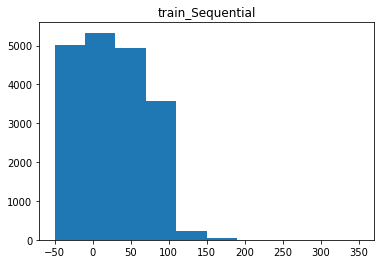

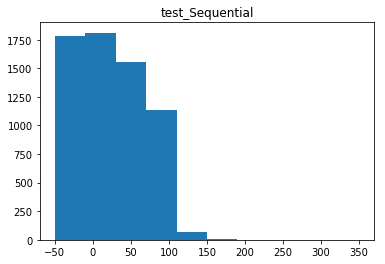

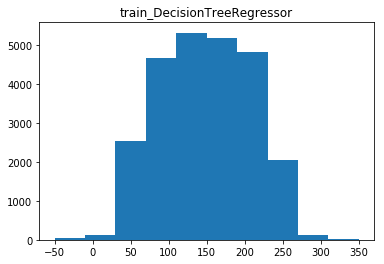

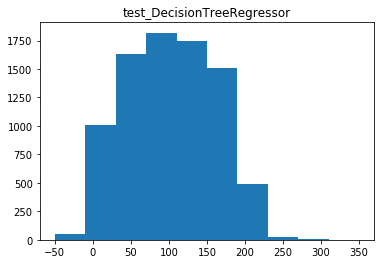

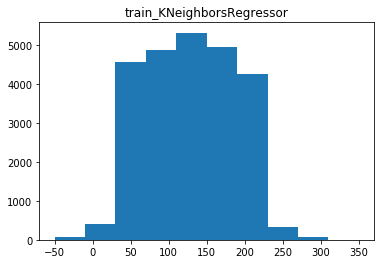

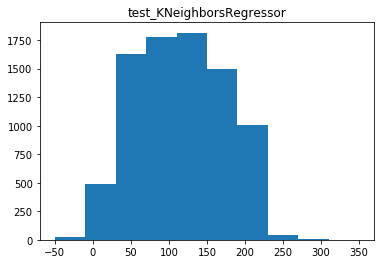

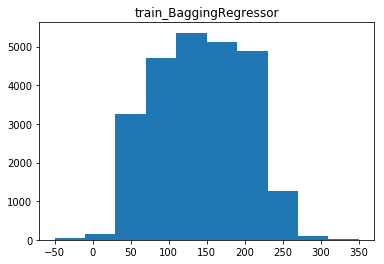

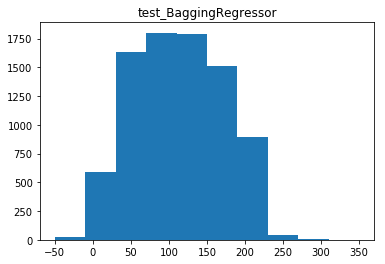

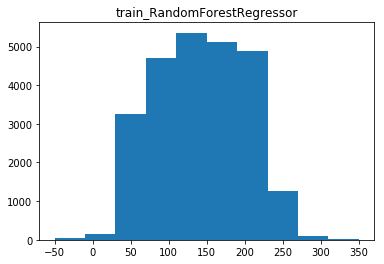

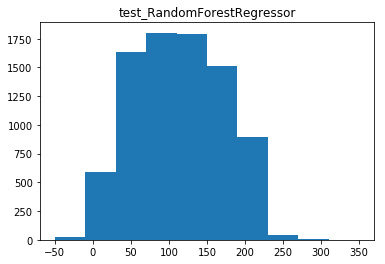

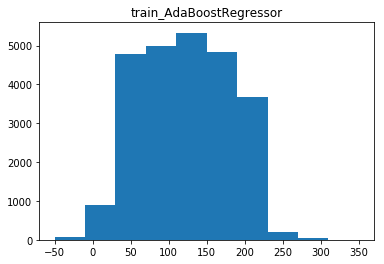

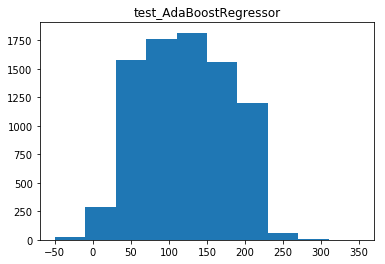

In [124]:
residuals = ['train_Sequential','test_Sequential','train_DecisionTreeRegressor','test_DecisionTreeRegressor',
             'train_KNeighborsRegressor','test_KNeighborsRegressor','train_BaggingRegressor','test_BaggingRegressor',
             'train_RandomForestRegressor','test_RandomForestRegressor','train_AdaBoostRegressor',
             'test_AdaBoostRegressor']
for res in residuals :
    plt.title(res)
    plt.hist(df_miss[~np.isnan(df_miss[res])][res], range=[-50,350])
    plt.show()

### Neural Network is Significantly Better, Tuning for 2 Target Variables (reb_rho, reb_ange)

In [144]:
def v2_nn():
    model = Sequential()
    model.add(Dense(X_train.shape[1], input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dropout(.05))
    model.add(Dense(5, activation='relu'))
    model.add(Dense(1, kernel_initializer='normal'))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

y1 = df_miss['reb_angle']
y2 = df_miss['reb_rho']

X_train, X_test, y_train, y_test = train_test_split(df_X, y1, random_state=42)

model = v2_nn()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100, verbose=1)

Train on 24894 samples, validate on 8299 samples
Epoch 1/50
24894/24894 [==============================] - 2s 74us/step - loss: 17377.1954 - val_loss: 5687.0941
Epoch 2/50
24894/24894 [==============================] - 1s 26us/step - loss: 5721.3028 - val_loss: 5405.2048
Epoch 3/50
24894/24894 [==============================] - 1s 22us/step - loss: 5425.1981 - val_loss: 5064.7422
Epoch 4/50
24894/24894 [==============================] - 1s 22us/step - loss: 5046.6596 - val_loss: 4654.6046
Epoch 5/50
24894/24894 [==============================] - 1s 21us/step - loss: 4663.2797 - val_loss: 4273.3082
Epoch 6/50
24894/24894 [==============================] - 1s 20us/step - loss: 4359.9161 - val_loss: 3989.2649
Epoch 7/50
24894/24894 [==============================] - 1s 22us/step - loss: 4113.2343 - val_loss: 3781.4039
Epoch 8/50
24894/24894 [==============================] - 1s 21us/step - loss: 3946.3917 - val_loss: 3589.4470
Epoch 9/50
24894/24894 [==============================] - 1s 2

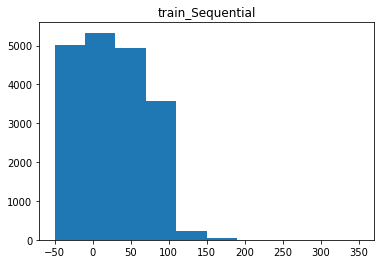

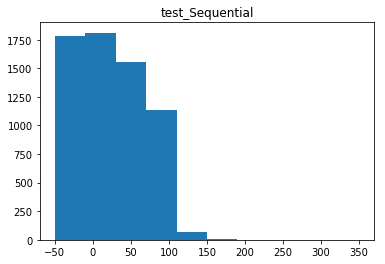

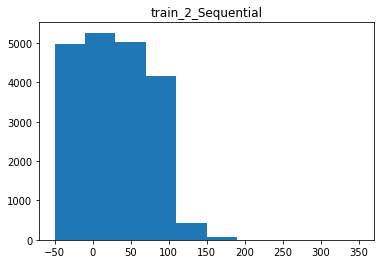

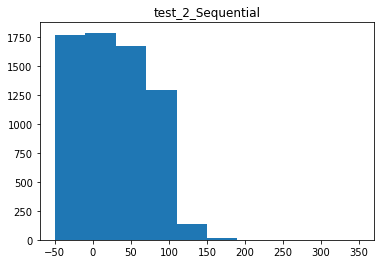

In [145]:
def pred_to_df(model, df_miss) :
    df_miss['train_2_' + type(model).__name__] = y_train - pd.Series(data=flatten(model.predict(X_train)), index=y_train.index)
    df_miss['test_2_' + type(model).__name__] = y_test - pd.Series(data=flatten(model.predict(X_test)), index=y_test.index)

pred_to_df(model, df_miss)

residuals = ['train_Sequential','test_Sequential','train_2_Sequential','test_2_Sequential'
            ]
for res in residuals :
    plt.title(res)
    plt.hist(df_miss[~np.isnan(df_miss[res])][res], range=[-50,350])
    plt.show()

In [143]:
X_train, X_test, y_train, y_test = train_test_split(df_X, 
                                                    y2, random_state=42)

ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

model = v2_nn()
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=100, verbose=1)

Train on 24894 samples, validate on 8299 samples
Epoch 1/50
24894/24894 [==============================] - 1s 58us/step - loss: 67.8417 - val_loss: 53.2690
Epoch 2/50
24894/24894 [==============================] - 0s 19us/step - loss: 52.2602 - val_loss: 52.9274
Epoch 3/50
24894/24894 [==============================] - 1s 22us/step - loss: 52.1399 - val_loss: 52.9045
Epoch 4/50
24894/24894 [==============================] - 1s 24us/step - loss: 52.1598 - val_loss: 52.8770
Epoch 5/50
24894/24894 [==============================] - 1s 30us/step - loss: 52.0937 - val_loss: 52.9744
Epoch 6/50
24894/24894 [==============================] - 1s 29us/step - loss: 52.0596 - val_loss: 52.8237
Epoch 7/50
24894/24894 [==============================] - 1s 27us/step - loss: 52.1494 - val_loss: 52.8530
Epoch 8/50
24894/24894 [==============================] - 1s 21us/step - loss: 52.0491 - val_loss: 52.8229
Epoch 9/50
24894/24894 [==============================] - 1s 28us/step - loss: 52.0356 - val_lo

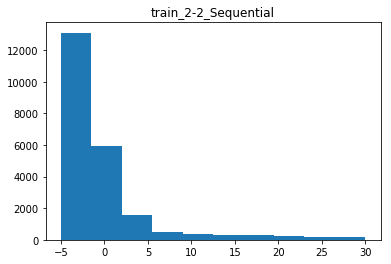

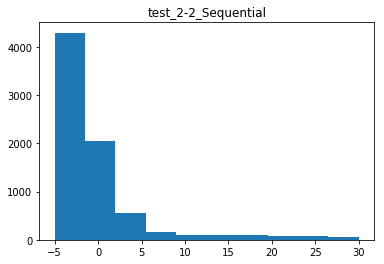

In [141]:
def pred_to_df(model, df_miss) :
    df_miss['train_2-2_' + type(model).__name__] = y_train - pd.Series(data=flatten(model.predict(X_train)), index=y_train.index)
    df_miss['test_2-2_' + type(model).__name__] = y_test - pd.Series(data=flatten(model.predict(X_test)), index=y_test.index)

pred_to_df(model, df_miss)

residuals = ['train_2-2_Sequential','test_2-2_Sequential'
            ]
for res in residuals :
    plt.title(res)
    plt.hist(df_miss[~np.isnan(df_miss[res])][res], range=[-5,30])
    plt.show()

In [146]:
df_miss.tail()

,shot_rho,shot_angle,reb_rho,reb_angle,reb_height,reb_time,x,y,LOC_X,LOC_Y,ACTION_TYPE,SHOT_MADE_FLAG,SHOT_DISTANCE,PLAYER_ID,PLAYER_NAME,SHOT_TYPE,SHOT_ZONE_AREA,SHOT_ZONE_BASIC,SHOT_ZONE_RANGE,TEAM_NAME,TEAM_ID,EVENTTIME,GAME_EVENT_ID,GAME_DATE,HTM,VTM,GAME_ID,quadrant,train_DecisionTreeRegressor,test_DecisionTreeRegressor,train_KNeighborsRegressor,test_KNeighborsRegressor,train_BaggingRegressor,test_BaggingRegressor,train_RandomForestRegressor,test_RandomForestRegressor,train_AdaBoostRegressor,test_AdaBoostRegressor,train_Sequential,test_Sequential,train_2_Sequential,test_2_Sequential,train_2-2_Sequential,test_2-2_Sequential
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
87519,24.52,110.28,33.98,203.88,8.55793,303.25,16.4753,191.2671,230,85,Jump Shot,0,24,202697,Iman Shumpert,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,Cleveland Cavaliers,1610612739,306,380,20160115,HOU,CLE,21500601,6,171.06357,NaN,151.454053,NaN,165.069424,NaN,165.045404,NaN,145.348561,NaN,18.966624,NaN,12.154551,NaN,28.100823,NaN
87522,26.49,235.77,5.69,150.91,9.33809,41.84,-94.6827,64.4006,-219,149,Jump Shot,0,26,202697,Iman Shumpert,3PT Field Goal,Left Side Center(LC),Above the Break 3,24+ ft.,Cleveland Cavaliers,1610612739,41,590,20160115,HOU,CLE,21500601,5,118.09357,NaN,98.484053,NaN,112.099424,NaN,112.075404,NaN,92.378561,NaN,-26.192325,NaN,-22.276493,NaN,-1.359827,NaN
87524,9.72,86.46,1.50,152.25,11.27227,591.64,98.1740,-3.4543,97,-6,Fadeaway Jump Shot,0,9,201977,Marcus Thornton,2PT Field Goal,Right Side(R),Mid-Range,8-16 ft.,Houston Rockets,1610612745,591,171,20160115,HOU,CLE,21500601,1,119.43357,NaN,99.824053,NaN,113.439424,NaN,113.415404,NaN,93.718561,NaN,-27.555450,NaN,-9.138687,NaN,-3.117789,NaN
87525,22.81,88.49,26.62,198.50,4.55712,580.32,153.9411,-1.3280,228,-6,Jump Shot,0,22,201977,Marcus Thornton,3PT Field Goal,Right Side(R),Right Corner 3,24+ ft.,Houston Rockets,1610612745,583,173,20160115,HOU,CLE,21500601,6,NaN,121.935661,NaN,135.202413,NaN,132.60235,NaN,132.581222,NaN,140.827144,NaN,11.943024,NaN,17.93277,NaN,20.778475
87527,25.35,123.25,36.29,162.70,4.01849,448.42,99.9809,285.0736,212,139,Jump Shot,0,25,201977,Marcus Thornton,3PT Field Goal,Right Side Center(RC),Above the Break 3,24+ ft.,Houston Rockets,1610612745,451,350,20160115,HOU,CLE,21500601,5,129.88357,NaN,110.274053,NaN,123.889424,NaN,123.865404,NaN,104.168561,NaN,-24.950757,NaN,-11.211697,NaN,29.491113,NaN
